# Generate butcher tableaus for Gauss-Legendre collocation methods 

In [5]:
import sympy
sympy.init_printing()
from IPython.display import display
import numpy as np

import sys
sys.path.insert(0, './code')

Butcher tableau for Gauss-Legendre collocation method of order 4:

Shifted Legendre polynomial of degree 2:


Roots / collocation points / coefficients C:


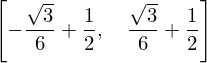

array([0.21132487, 0.78867513])

Lagrange basis polynomials:


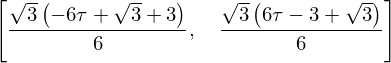

Coefficients A:


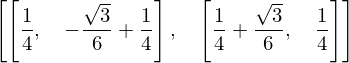

array([[ 0.25      , -0.03867513],
       [ 0.53867513,  0.25      ]])

Coefficients B:


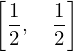

array([0.5, 0.5])

In [6]:
s = 2
print(f"Butcher tableau for Gauss-Legendre collocation method of order {2*s}:\n")

from sympy.abc import tau, x

print(f"Shifted Legendre polynomial of degree {s}:")
P = (x**s * (x - 1)**s).diff(x, s).simplify() / sympy.factorial(s)
display(P)

print(f"Roots / collocation points / coefficients C:")
C = sympy.solve(P)
C.sort()
Cf = np.array([float(c) for c in C])
display(C)
display(Cf)

print("Lagrange basis polynomials:")
L = []
for i in range(1, s+1):
    l = 1
    for j in range(1, s+1):
        if j != i:
            l = (l * (tau - C[j-1]) / (C[i-1] - C[j-1])).simplify()
    L.append(l)
display(L)

print("Coefficients A:")
A = [[sympy.integrate(l, (tau, 0, c)).simplify() for l in L] for c in C]
Af = np.array([[float(a) for a in r] for r in A])
display(A)
display(Af)

print("Coefficients B:")
B = [sympy.integrate(l, (tau, 0, 1)).simplify() for l in L]
Bf = np.array([float(b) for b in B])
display(B)
display(Bf)

Some of this code ended up in the function `butcher(s)` in the module `code/gauss_legendre.py`